In [ ]:
!pip install astroquery


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.4/999.4 kB 27.5 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from astroquery.skyview import SkyView

In [ ]:
hdu = SkyView.get_images("NGC 5033","SDSSi")[0][0]

In [ ]:
ngc_header = hdu.header

In [ ]:
ngc_pixel = hdu.data

In [ ]:
type(ngc_pixel)

numpy.ndarray

In [ ]:
ngc_pixel.shape

(300, 300)

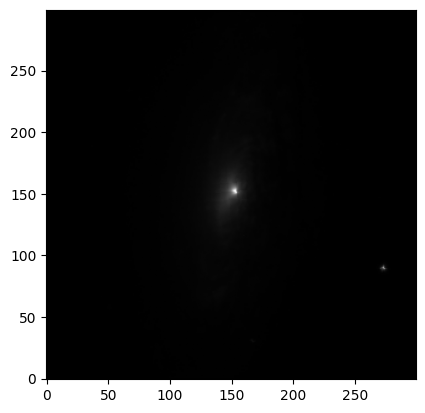

In [ ]:
plt.imshow(ngc_pixel,cmap="gray",origin = "lower")

#***ssdgi***

In [ ]:
from astropy.io import fits

In [ ]:
fits.HDUList()

[]

In [ ]:
#steps to prepare FITS file
hdulist=fits.HDUList()
#create primary hdu
hdu1=fits.PrimaryHDU()
#add pixel data
hdu1.data = ngc_pixel
#add meta data
hdu1.header = ngc_header

hdulist.append(hdu1)
#generate the fits data
hdulist.writeto('ngc_fits_file1.fits')

In [ ]:
hdu1.data

array([[0.2084961 , 0.1508789 , 0.1126709 , ..., 0.16015625, 0.06408691,
        0.11535645],
       [0.12548828, 0.11901855, 0.2019043 , ..., 0.05773926, 0.13452148,
        0.03851318],
       [0.15722656, 0.09985352, 0.1126709 , ..., 0.12817383, 0.08337402,
        0.05773926],
       ...,
       [0.08679199, 0.08044434, 0.05493164, ..., 0.19726562, 0.22265625,
        0.23535156],
       [0.08679199, 0.03582764, 0.09960938, ..., 0.12060547, 0.24829102,
        0.20361328],
       [0.02944946, 0.13769531, 0.04217529, ..., 0.15258789, 0.19067383,
        0.18432617]], dtype='>f4')

In [ ]:
my_fits=fits.open('ngc_fits_file1.fits')

In [ ]:
my_fits[0].header

SIMPLE  =                    T / Written by SkyView Fri Apr 11 14:47:35 EDT 2025
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              198.365 / Reference longitude                            
CRVAL2  =              36.5936 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [ ]:
a=my_fits[0].data

In [ ]:
type(a)

numpy.ndarray

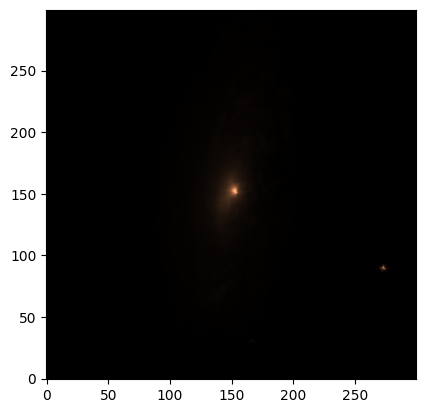

In [ ]:
plt.imshow(ngc_pixel,cmap='copper',origin = 'lower')
plt.savefig(base_dir+'normal_image.png')

In [ ]:
ngc_pixel[150,151]

np.float32(65.875)

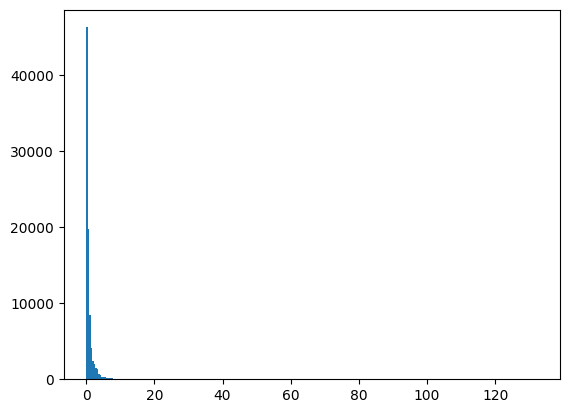

In [ ]:
plt.hist(ngc_pixel.flat,bins = 300)
plt.show()

In [ ]:
print('Summary statistics of M31 pixels')
print(f'Minimum: ={np.min(ngc_pixel)}')
print(f'Maximum: ={np.max(ngc_pixel)}')
print(f'Average: ={np.mean(ngc_pixel)}')
print(f'std: ={np.std(ngc_pixel)}')

Summary statistics of M31 pixels
Minimum: =0.00649261474609375
Maximum: =132.25
Average: =1.0627517700195312
std: =2.770545482635498


In [ ]:
def plot_pixels(pixel_array,title,color):
  plt.imshow(pixel_array,cmap = 'gray',origin = 'lower')
  plt.title(title,color = color,weight = 'bold')
  plt.axis('off')
  plt.show()

In [ ]:
def compare_pixel(scaled_array,title):
  plt.subplot(1,2,1)
  plot_pixels(ngc_pixel,title='original scaling',color='royalblue')
  plt.subplot(1,2,1)
  plt.tight_layout()
  plot_pixels(scaled_array,title=title,color='royalblue')
  plt.show()

**minmax scaling
**

In [ ]:
def minmax_scaling(pixel_array):
  num = pixel_array - np.min(pixel_array)
  den = np.max(pixel_array) - np.min(pixel_array)
  return num/den

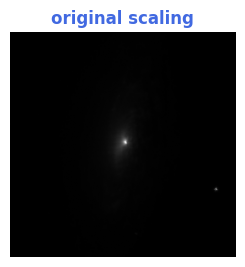

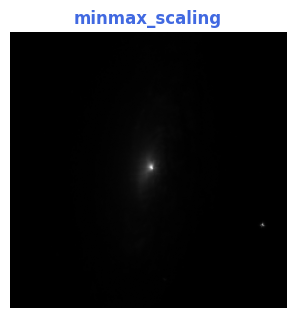

In [ ]:
minmaxx_array=minmax_scaling(ngc_pixel)
compare_pixel(minmaxx_array,title = 'minmax_scaling')

log scaling

In [ ]:
def log_scaling(pixel_array):
  return np.log(pixel_array)

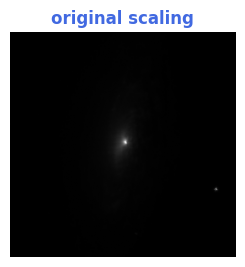

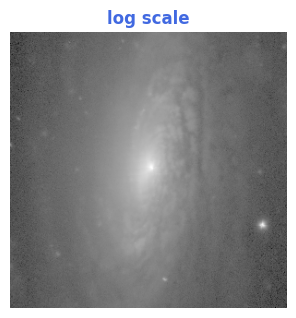

<Figure size 640x480 with 0 Axes>

In [ ]:
log_array = log_scaling(ngc_pixel)
compare_pixel(log_array,title='log scale')
plt.savefig(base_dir+'log_scaling.png')

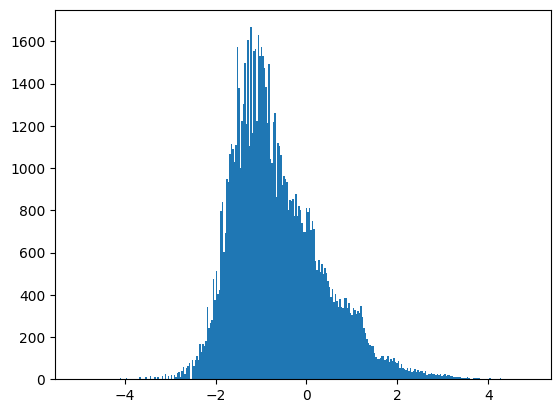

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.hist(log_array.flat,bins=300)
plt.show()
plt.savefig(base_dir+'log_scale_hist.png')

Z scale

In [ ]:
def zscaling(pixel_array):
  num = pixel_array - np.mean(pixel_array)
  den = np.std(pixel_array)
  return num/den

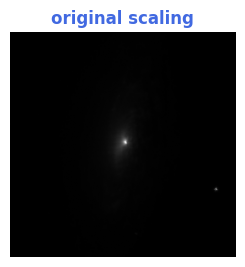

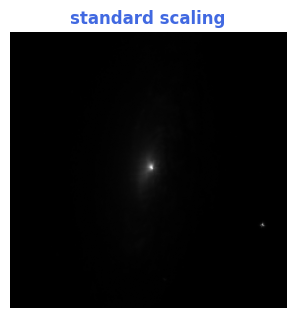

In [ ]:
zscaled_array = zscaling(ngc_pixel)
compare_pixel(zscaled_array,title='standard scaling')

zscaleinterval

In [ ]:
from astropy.visualization import ZScaleInterval

In [ ]:
z=ZScaleInterval()

In [ ]:
z1,z2 = z.get_limits(log_array)

In [ ]:
print(f'Minimum = {z1}')
print(f'Maximum = {z2}')

Minimum = -3.329035758972168
Maximum = 4.062595844268799


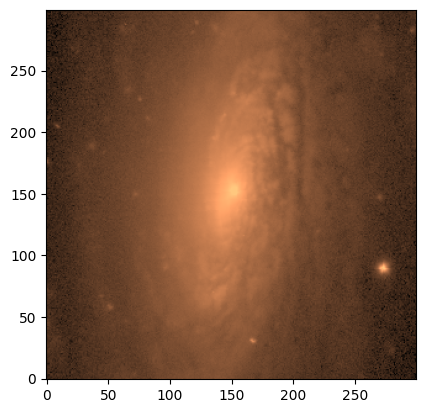

<Figure size 640x480 with 0 Axes>

In [ ]:
img = plt.imshow(log_array,vmin=z1,vmax=z2,cmap='copper',origin='lower')
plt.show()
plt.savefig(base_dir+'z_scaling_interval.png')

In [ ]:
image_array = img.make_image(renderer=None, unsampled = True)[0]

In [ ]:
image_array.shape

(300, 300, 4)

In [ ]:
import cv2

In [ ]:
gray_array = cv2.cvtColor(image_array,cv2.COLOR_BGRA2GRAY)

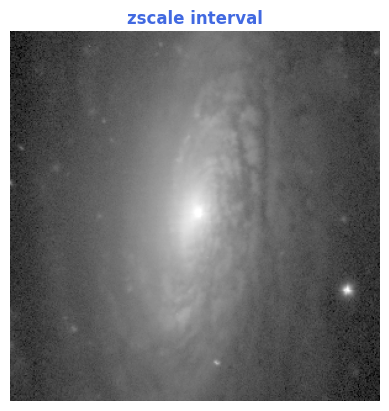

In [ ]:
plot_pixels(gray_array,title = 'zscale interval',color = 'royalblue')

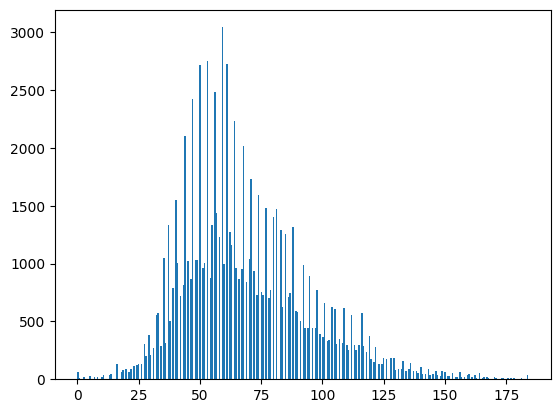

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.hist(gray_array.flat,bins=300)
plt.show()
plt.savefig(base_dir+'zscale_hist.png')

In [ ]:
grayscal_zint_array  = gray_array

In [ ]:
from scipy.signal import convolve2d

In [ ]:
kernel = np.ones((3,3))/9

In [ ]:
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [ ]:
gaussian_kernel = np.array([[1/16,1/8,1/16],
                            [1/8,1/4,1/8],
                            [1/16,1/8,1/16]])

In [ ]:
convolved_img = convolve2d(ngc_pixel,kernel,mode = 'same')

In [ ]:
gaussian_convolved_img = convolve2d(ngc_pixel,gaussian_kernel,mode = 'same')

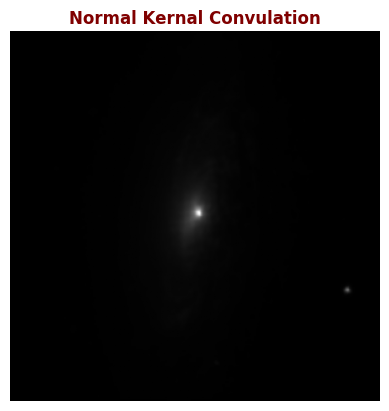

In [ ]:
plot_pixels(convolved_img,title='Normal Kernal Convulation',color = 'maroon')

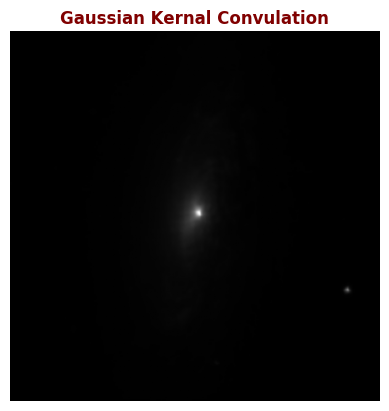

In [ ]:
plot_pixels(gaussian_convolved_img,title='Gaussian Kernal Convulation',color = 'maroon')

In [ ]:
convolve_grayscale = convolve2d(grayscal_zint_array,gaussian_kernel,mode = 'same')

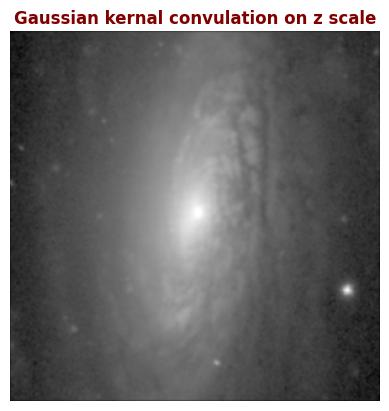

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_pixels(convolve_grayscale,title ='Gaussian kernal convulation on z scale',color = 'maroon')
plt.savefig(base_dir+'gkc.png')


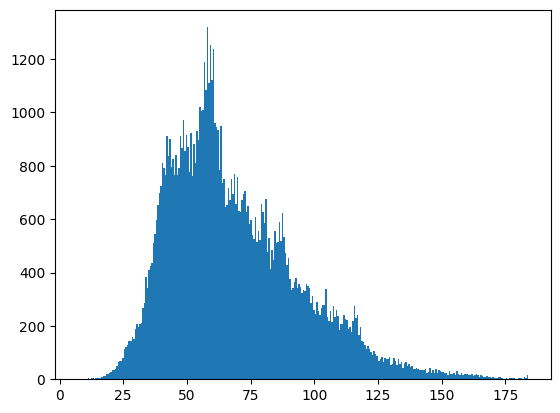

In [ ]:
plt.hist(convolve_grayscale.flat,bins = 300)
plt.show()

In [ ]:
SPECTRAL_LIST = ["gray","jet","hot","prism","nipy_spectral"]

In [ ]:
from skimage.filters import meijering,sato

In [ ]:
meijering_output = meijering(convolve_grayscale)
sato_output = sato(convolve_grayscale)

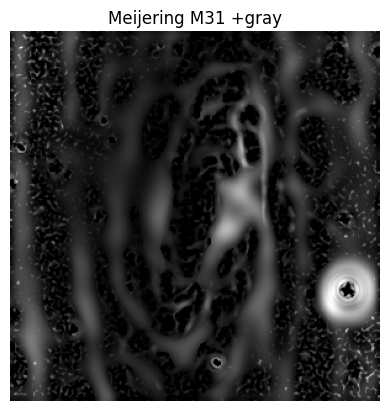

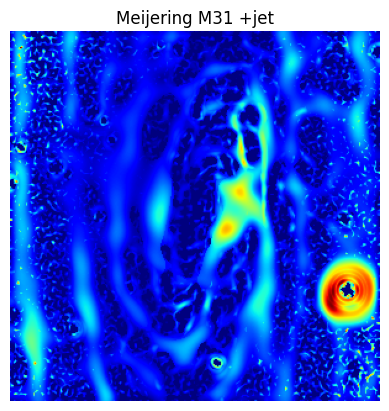

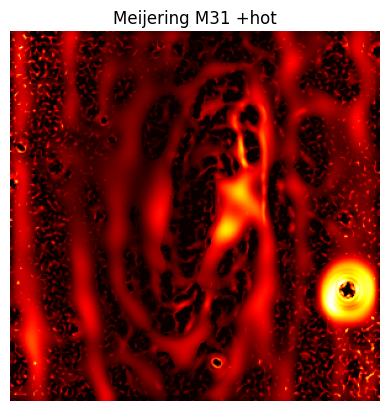

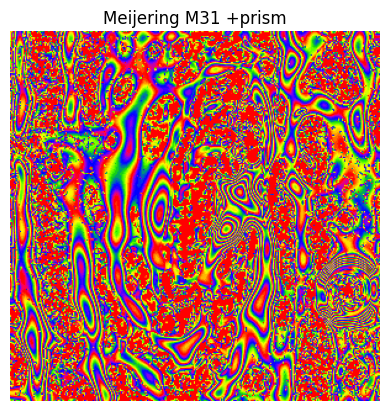

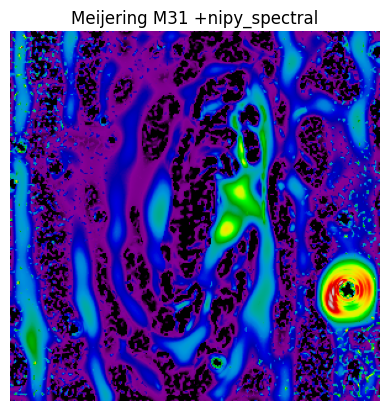

<Figure size 640x480 with 0 Axes>

In [ ]:
#fro each elemrnt in spectral list implement meijering filter'
for colormap in SPECTRAL_LIST:
  plt.imshow(meijering_output,cmap = colormap,origin = 'lower')
  plt.title(f'Meijering M31 +{colormap}')
  plt.axis('off')
  plt.show()
  plt.savefig(base_dir+'meijering.png')


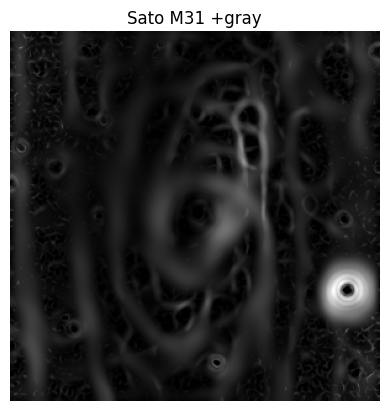

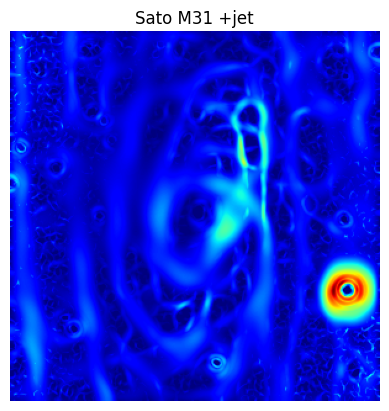

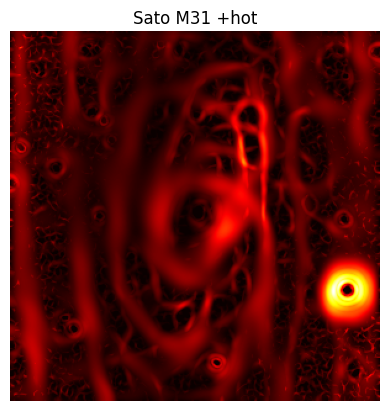

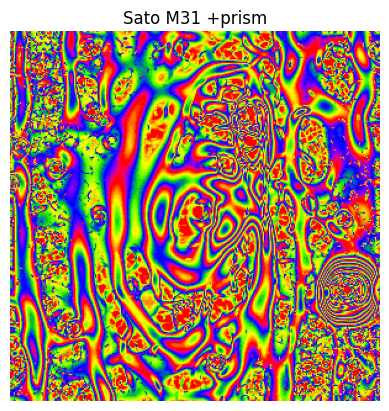

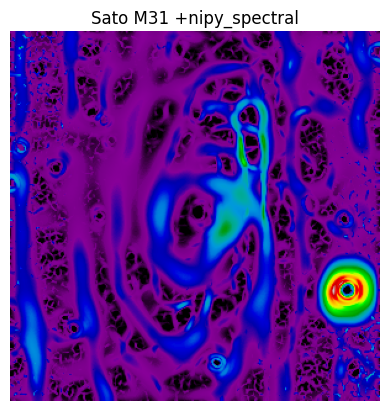

<Figure size 640x480 with 0 Axes>

In [ ]:
#for sato output
for colormap in SPECTRAL_LIST:
  plt.imshow(sato_output,cmap = colormap,origin = 'lower')
  plt.title(f'Sato M31 +{colormap}')
  plt.axis('off')
  plt.show()
  plt.savefig(base_dir+'sato.png')

In [ ]:
from skimage.feature import corner_foerstner

In [ ]:
feature_output = corner_foerstner(convolve_grayscale)

In [ ]:
feature_output[1]

array([[0.74971495, 0.66911705, 0.23620051, ..., 0.36362811, 0.7086044 ,
        0.75131654],
       [0.66491218, 0.90764799, 0.5358624 , ..., 0.78420542, 0.87892135,
        0.63777885],
       [0.23499177, 0.54635189, 0.87440489, ..., 0.74137051, 0.44227712,
        0.27413244],
       ...,
       [0.31781581, 0.59246135, 0.52238654, ..., 0.9943109 , 0.59779298,
        0.26861339],
       [0.48523937, 0.62610375, 0.388981  , ..., 0.56820939, 0.94789255,
        0.68904686],
       [0.53738734, 0.48550255, 0.23367612, ..., 0.27606929, 0.71526575,
        0.75604785]])

In [ ]:
len(feature_output)

2

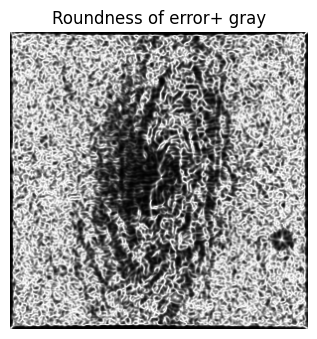

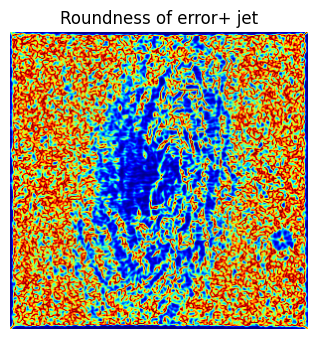

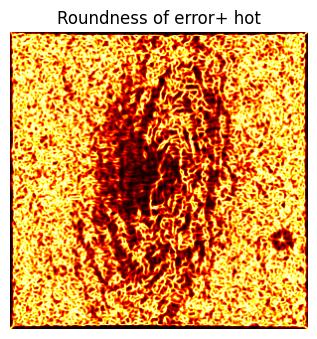

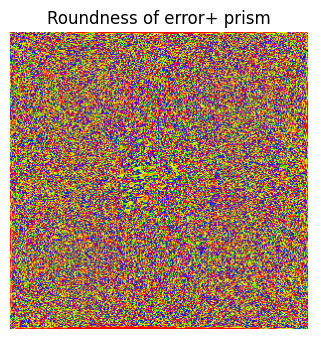

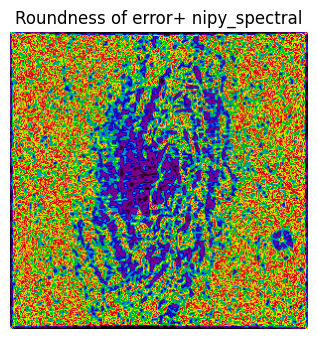

<Figure size 640x480 with 0 Axes>

In [ ]:
for colormap in SPECTRAL_LIST:
  plt.subplot(1,2,1)
  plt.imshow(feature_output[0],cmap = colormap,origin = 'lower')
  plt.title(f'Error image+ {colormap}')
  plt.axis('off')

  plt.subplot(1,2,1)
  plt.imshow(feature_output[1],cmap = colormap,origin = 'lower')
  plt.title(f'Roundness of error+ {colormap}')
  plt.axis('off')
  plt.tight_layout()
  plt.show()
  plt.savefig(base_dir+'corner_foestner.png')

In [ ]:
import os

In [ ]:
folder_name = 'ngc_5033'
os.makedirs(folder_name,exist_ok=True)
base_dir = f'/content/{folder_name}/'

ModuleNotFoundError: No module named 'astroquery'